In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools

%matplotlib inline
%reload_ext nb_black

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

<IPython.core.display.Javascript object>

In [3]:
class_names = np.unique(y_train)

<IPython.core.display.Javascript object>

In [4]:
def create_simple_model() -> keras.models.Model():

    model = keras.Sequential()
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=256, activation="relu"))
    model.add(keras.layers.Dense(units=len(class_names), activation="softmax"))

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model

<IPython.core.display.Javascript object>

In [5]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
    min_delta=0.01, patience=4, verbose=2, restore_best_weights=True
)


<IPython.core.display.Javascript object>

In [6]:
simple_model = create_simple_model()

<IPython.core.display.Javascript object>

In [7]:
simple_model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    batch_size=256,
    callbacks=[early_stopping],
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 25us/sample - loss: 0.2927 - accuracy: 0.9159 - val_loss: 0.1225 - val_accuracy: 0.9662
Epoch 2/50
54000/54000 [==============================] - 1s 21us/sample - loss: 0.1067 - accuracy: 0.9678 - val_loss: 0.0889 - val_accuracy: 0.9738
Epoch 3/50
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0773 - val_accuracy: 0.9780
Epoch 4/50
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 5/50
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 6/50
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0772 - val_accuracy: 0.9770
Epoch 7/50
54000/54000 [==============================] -

<IPython.core.display.Javascript object>

In [8]:
simple_model.evaluate(x_test, y_test, verbose=0)

[0.07496312079606578, 0.9768]

<IPython.core.display.Javascript object>

## Convolution Model

In [9]:
def create_convolution_model() -> keras.models.Model():

    model = keras.Sequential()

    model.add(
        keras.layers.Conv2D(
            filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        )
    )
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=256, activation="relu"))
    model.add(keras.layers.Dense(units=len(class_names), activation="softmax"))

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model

<IPython.core.display.Javascript object>

In [10]:
conv_model = create_convolution_model()

<IPython.core.display.Javascript object>

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

<IPython.core.display.Javascript object>

In [12]:
conv_model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    batch_size=256,
    callbacks=[early_stopping],
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 20s 365us/sample - loss: 0.2412 - accuracy: 0.9284 - val_loss: 0.0643 - val_accuracy: 0.9810
Epoch 2/50
54000/54000 [==============================] - 19s 356us/sample - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 3/50
54000/54000 [==============================] - 18s 341us/sample - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 4/50
54000/54000 [==============================] - 20s 362us/sample - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0430 - val_accuracy: 0.9890
Epoch 5/50
54000/54000 [==============================] - 18s 329us/sample - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 6/50
54000/54000 [==============================] - 17s 321us/sample - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0381 - val_accuracy: 0.9903
Epoch 7/50
54000/54000 [=====================

<IPython.core.display.Javascript object>

In [13]:
conv_model.evaluate(x_test, y_test, verbose=0)

[0.0303764804004546, 0.989]

<IPython.core.display.Javascript object>

In [18]:
index = 23

conv_model.predict_classes(x_test[index].reshape(1, 28, 28, 1))[0]

5

<IPython.core.display.Javascript object>

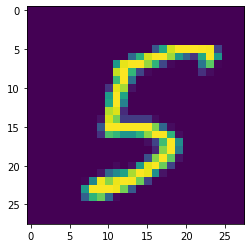

<IPython.core.display.Javascript object>

In [19]:
plt.imshow(x_test[index].reshape(28, 28))
plt.show()